In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import missingno

from google.colab import files
uploaded = files.upload()

Saving aug_train.csv to aug_train (1).csv


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
import sklearn.model_selection as model_selection
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score

In [ ]:
def get_value_counts(train, column):
    print('\n',train[column].value_counts(),'\t')

In [ ]:
def convert_null_values(train, column):
  train[column].fillna(value='Not Provided', inplace=True)

In [ ]:
def create_plot(column, train):
  fig = plt.figure(figsize=(20,10))
  
  plt.subplot(1,2,1)
  sns.countplot(x=column, data=train_data)
  # plt.title('Overall Statistics according to',column)

  plt.subplot(1,2,2)
  sns.countplot(x=column, hue= 'target',data= train)
  

In [ ]:
def add_to_df(column, from_df, to_bin,to_con):
  to_bin[column] = from_df[column]
  to_con[column] = from_df[column]

In [ ]:
train_data = pd.read_csv('aug_train.csv')
print(train_data.head().to_string())

   enrollee_id      city  city_development_index gender      relevent_experience enrolled_university education_level major_discipline experience company_size    company_type last_new_job  training_hours  target
0         8949  city_103                   0.920   Male  Has relevent experience       no_enrollment        Graduate             STEM        >20          NaN             NaN            1              36     1.0
1        29725   city_40                   0.776   Male   No relevent experience       no_enrollment        Graduate             STEM         15        50-99         Pvt Ltd           >4              47     0.0
2        11561   city_21                   0.624    NaN   No relevent experience    Full time course        Graduate             STEM          5          NaN             NaN        never              83     0.0
3        33241  city_115                   0.789    NaN   No relevent experience                 NaN        Graduate  Business Degree         <1          Na

In [ ]:
print(train_data.describe())

        enrollee_id  city_development_index  training_hours        target
count  19158.000000            19158.000000    19158.000000  19158.000000
mean   16875.358179                0.828848       65.366896      0.249348
std     9616.292592                0.123362       60.058462      0.432647
min        1.000000                0.448000        1.000000      0.000000
25%     8554.250000                0.740000       23.000000      0.000000
50%    16982.500000                0.903000       47.000000      0.000000
75%    25169.750000                0.920000       88.000000      0.000000
max    33380.000000                0.949000      336.000000      1.000000


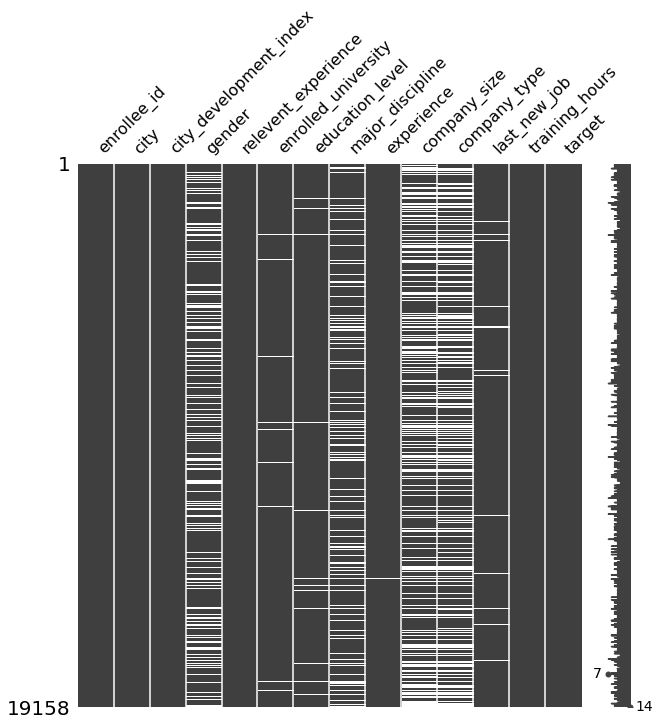

In [ ]:
missingno.matrix(train_data, figsize=(10,10))

In [ ]:
train_data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [ ]:
convert_null_values(train_data, 'gender')
get_value_counts(train_data, 'gender')


 Male            13221
Not Provided     4508
Female           1238
Other             191
Name: gender, dtype: int64 	


In [ ]:
convert_null_values(train_data, 'major_discipline')
get_value_counts(train_data, 'major_discipline')


 STEM               14492
Not Provided        2813
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64 	


In [ ]:
convert_null_values(train_data, 'company_size')
get_value_counts(train_data, 'company_size')


 Not Provided    5938
50-99           3083
100-500         2571
10000+          2019
10/49           1471
1000-4999       1328
<10             1308
500-999          877
5000-9999        563
Name: company_size, dtype: int64 	


In [ ]:
convert_null_values(train_data,'company_type')
get_value_counts(train_data, 'company_type')


 Pvt Ltd                9817
Not Provided           6140
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64 	


In [ ]:
train_data.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university       386
education_level           460
major_discipline            0
experience                 65
company_size                0
company_type                0
last_new_job              423
training_hours              0
target                      0
dtype: int64

In [ ]:
train_data.dropna(inplace=True)

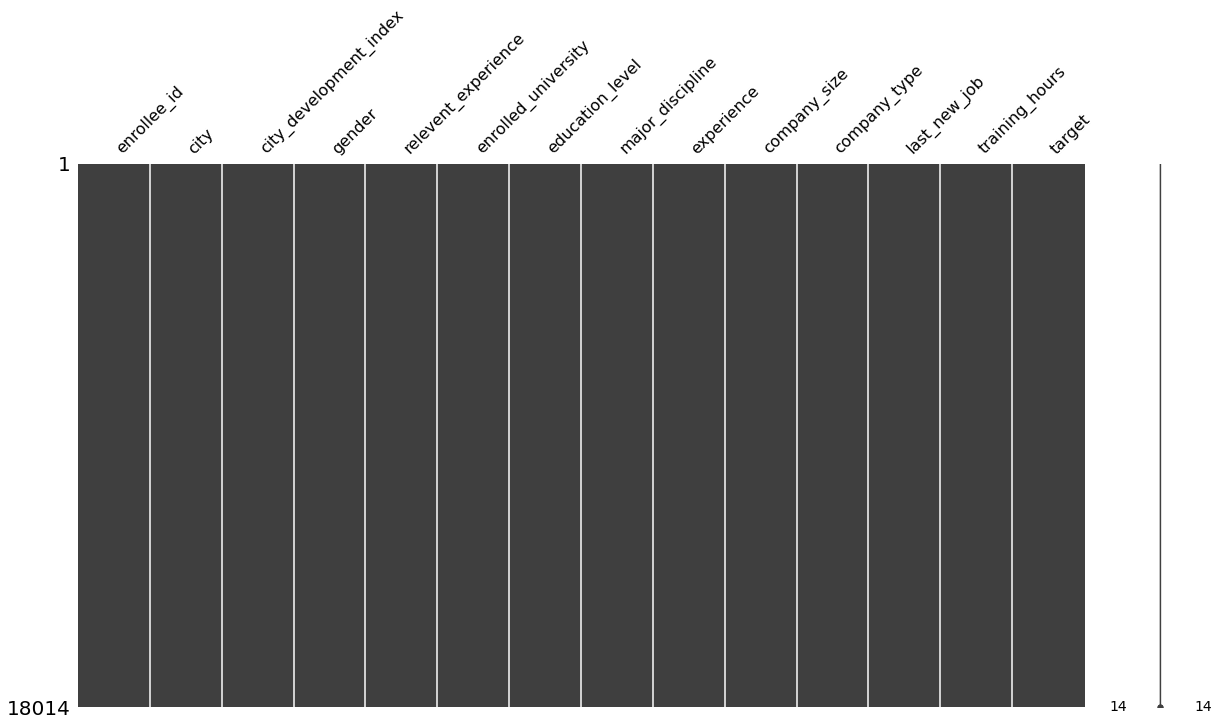

In [ ]:
missingno.matrix(train_data,figsize=(20,10))

In [ ]:

df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

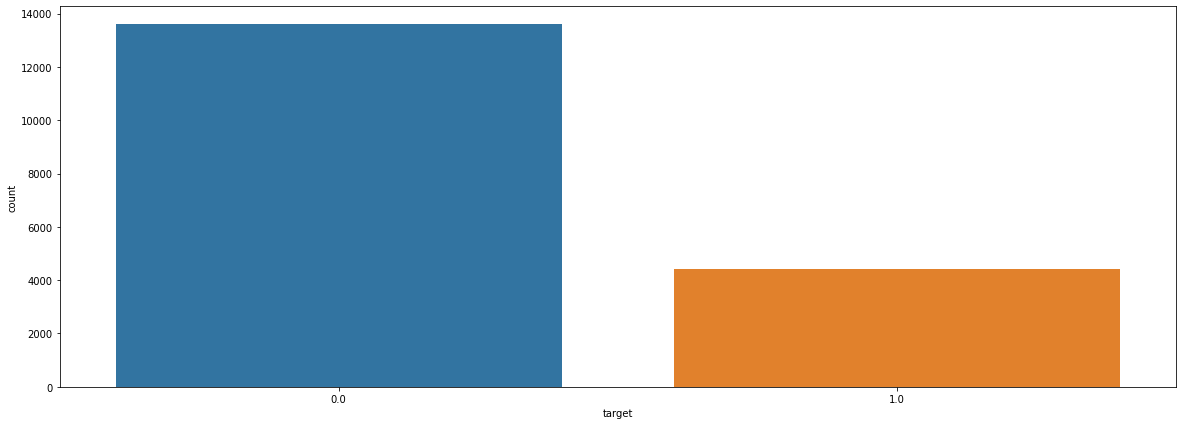

In [ ]:
fig = plt.figure(figsize=(20,7))
sns.countplot(x='target', data=train_data)

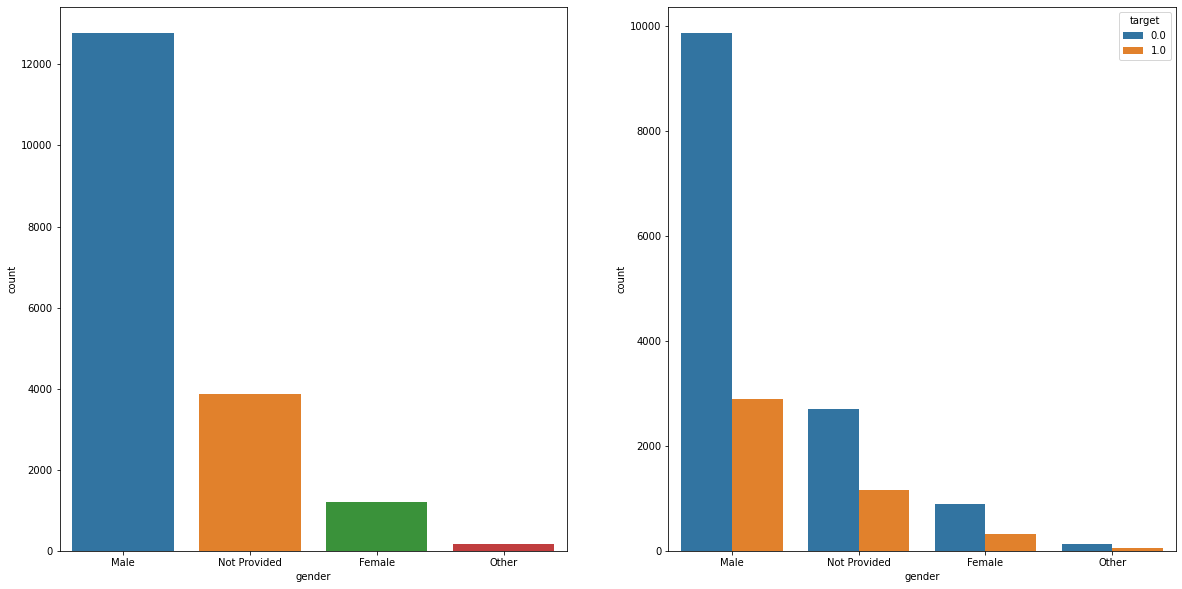

In [ ]:
create_plot('gender',train_data)

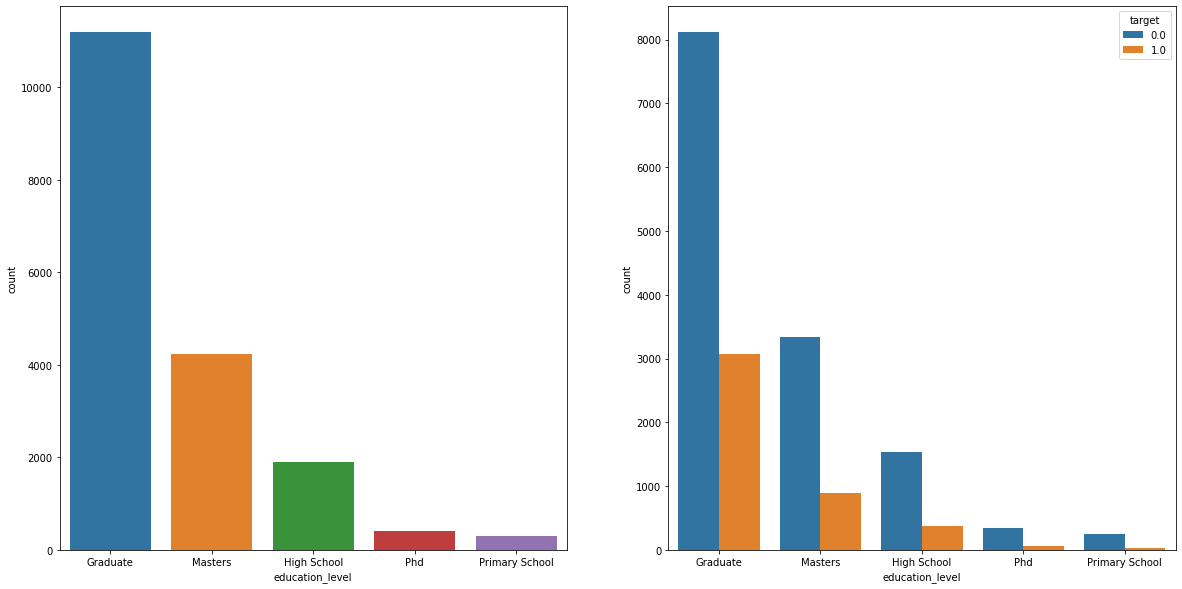

In [ ]:
create_plot('education_level', train_data)

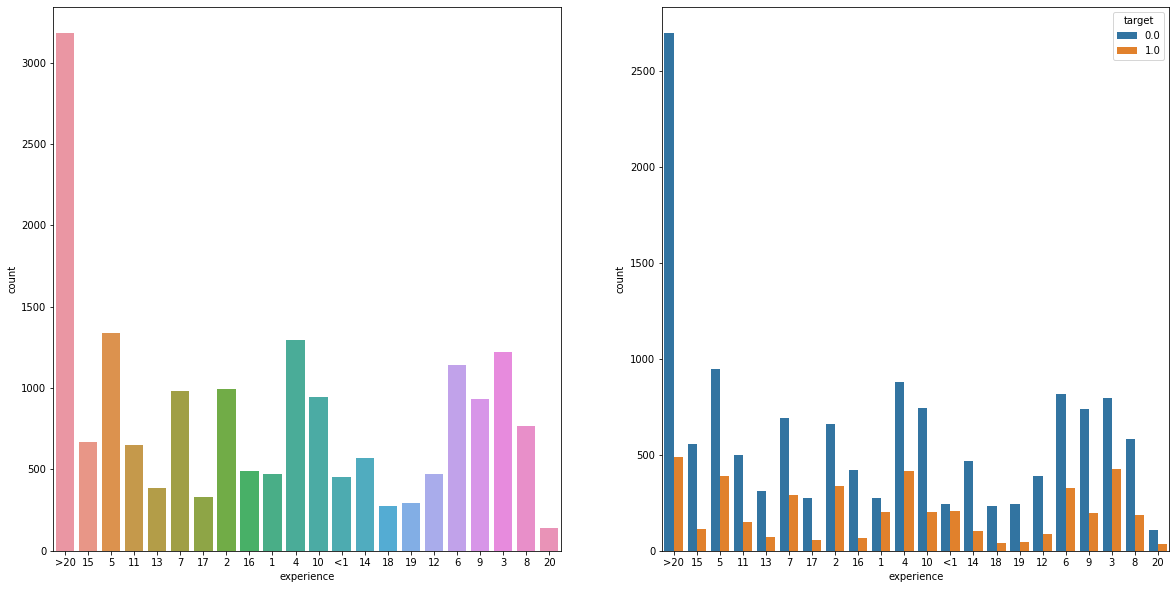

In [ ]:
create_plot('experience',train_data)

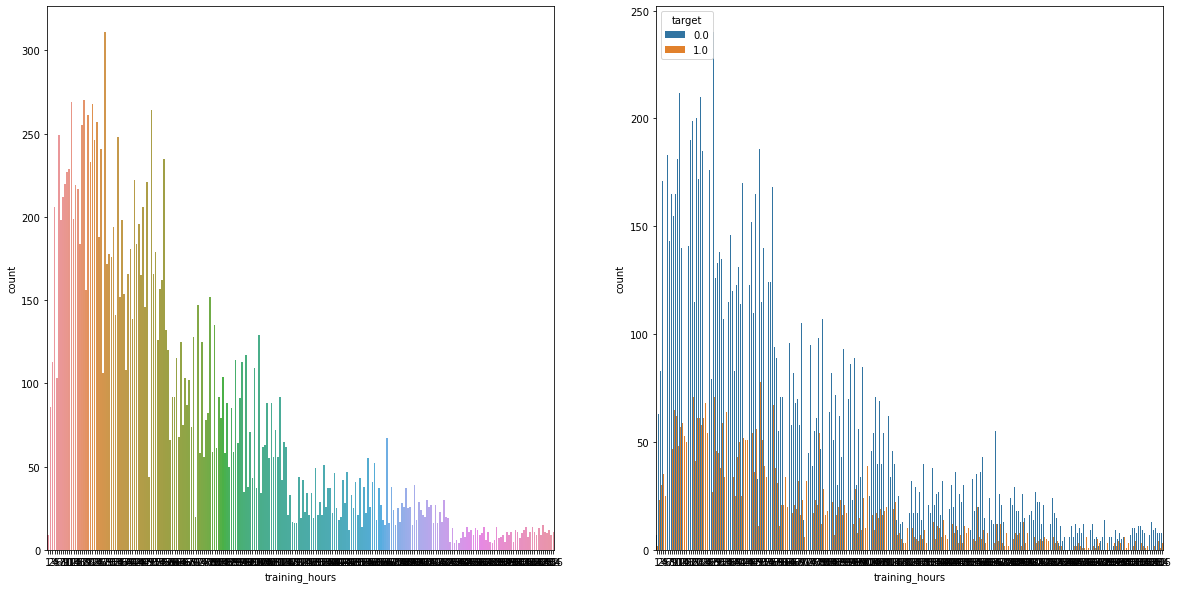

In [ ]:
create_plot('training_hours', train_data)

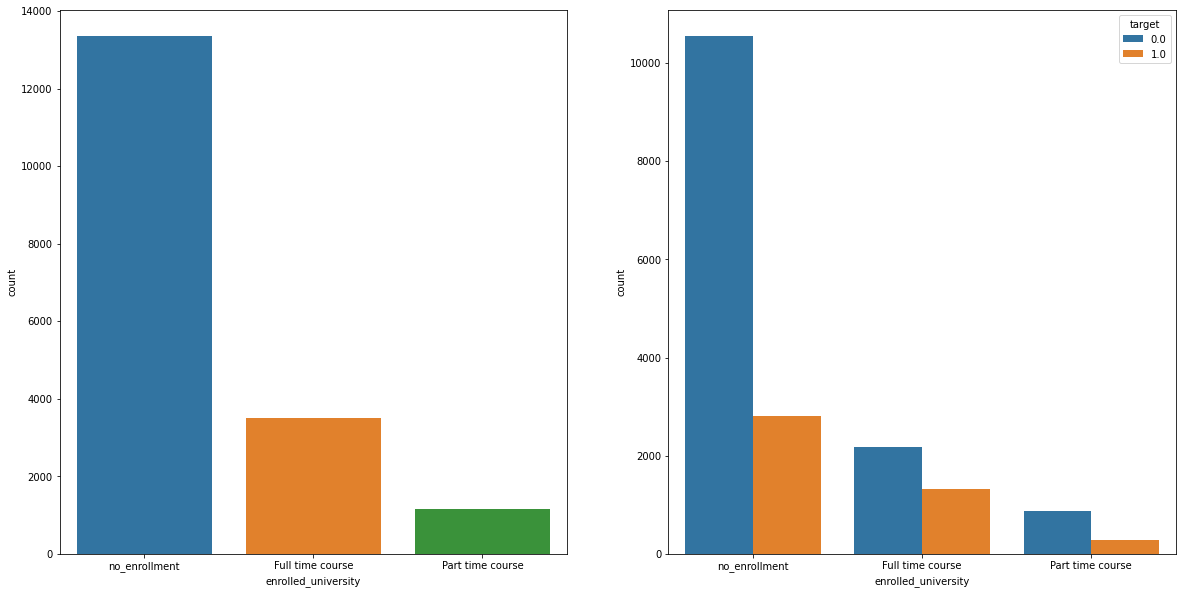

In [ ]:
create_plot('enrolled_university', train_data)

In [ ]:
df_bin['Label'] = train_data['target']
df_con['Label'] = train_data['target']

In [ ]:
add_to_df('gender', train_data, df_bin, df_con)
add_to_df('education_level', train_data, df_bin, df_con)
add_to_df('enrolled_university', train_data, df_bin, df_con)
add_to_df('training_hours', train_data, df_bin, df_con)
add_to_df('experience', train_data, df_bin, df_con)

In [ ]:
df_bin.head()

,Label,gender,education_level,enrolled_university,training_hours,experience
0,1.0,Male,Graduate,no_enrollment,36,>20
1,0.0,Male,Graduate,no_enrollment,47,15
2,0.0,Not Provided,Graduate,Full time course,83,5
4,0.0,Male,Masters,no_enrollment,8,>20
5,1.0,Not Provided,Graduate,Part time course,24,11


In [ ]:
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Label')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)
df_bin_enc.head()

,Label,gender_Female,gender_Male,gender_Not Provided,gender_Other,education_level_Graduate,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,training_hours_1,training_hours_2,training_hours_3,training_hours_4,training_hours_5,training_hours_6,training_hours_7,training_hours_8,training_hours_9,training_hours_10,training_hours_11,training_hours_12,training_hours_13,training_hours_14,training_hours_15,training_hours_16,training_hours_17,training_hours_18,training_hours_19,training_hours_20,training_hours_21,training_hours_22,training_hours_23,training_hours_24,training_hours_25,training_hours_26,training_hours_27,...,training_hours_300,training_hours_302,training_hours_304,training_hours_306,training_hours_308,training_hours_310,training_hours_312,training_hours_314,training_hours_316,training_hours_320,training_hours_322,training_hours_324,training_hours_326,training_hours_328,training_hours_330,training_hours_332,training_hours_334,training_hours_336,experience_1,experience_10,experience_11,experience_12,experience_13,experience_14,experience_15,experience_16,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20
0,1.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,1.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df_bin_enc.dropna().drop(columns=['Label']).values
y = df_bin_enc.dropna()['Label'].values

# X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=80)

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=80)

In [ ]:
logmodel = LogisticRegression()


logmodel.fit(X_train,y_train)
log_prediction = logmodel.predict(X_test)
cm_log = confusion_matrix(y_test, log_prediction)
log_df = pd.DataFrame(data=[accuracy_score(y_test, log_prediction), recall_score(y_test, log_prediction),
                   precision_score(y_test, log_prediction), roc_auc_score(y_test, log_prediction)], 
             columns=['Logisitc Regression Score'],
             index=["Accuracy", "Recall", "Precision", "ROC AUC Score"])

In [ ]:
log_df

,Logisitc Regression Score
Accuracy,0.762442
Recall,0.087326
Precision,0.523148
ROC AUC Score,0.531136
